<a href="https://colab.research.google.com/github/Piyushanand7/21BDS0038/blob/main/21BDS0038_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub Link:https://github.com/Piyushanand7/21BDS0038/blob/main/21BDS0038_2.ipynb
# PIYUSH ANAND
# 21BDS0038
     

**Step 1: Import Libraries**

Description: Load essential libraries for data manipulation, visualization, and machine learning.

In [ ]:
# 21BDS0038
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")  # 21BDS0038


**Step 2: Load & Clean Data**

Description: Load the dataset and perform initial cleaning (remove unwanted columns, handle missing data).

In [ ]:
# 21BDS0038
df = pd.read_csv("https://cdn.jsdelivr.net/gh/Piyushanand7/21BDS0038@main/21BDS0038.csv")

# Remove redundant 'rownames' column if exists
df.drop(columns=['rownames'], inplace=True, errors='ignore')

# Drop columns with more than 50% missing values
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])


**Step 3: Encode Categorical Variables**

Description: Convert categorical variables to numerical using Label Encoding.

In [ ]:
# 21BDS0038
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))  # 21BDS0038


**Step 4: Exploratory Data Visualization**

Description: Explore 1D and 2D visualizations to understand data distribution and correlations.

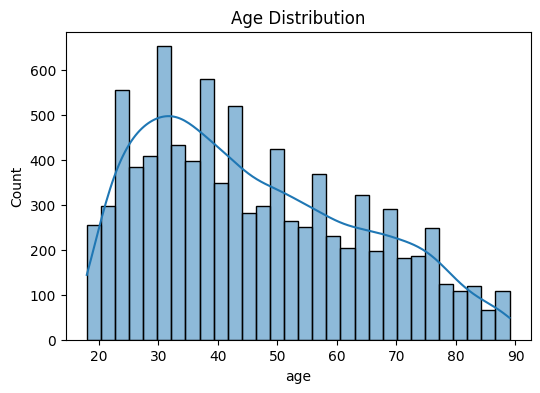

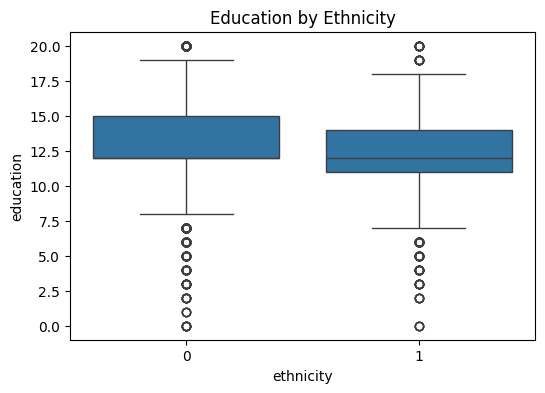

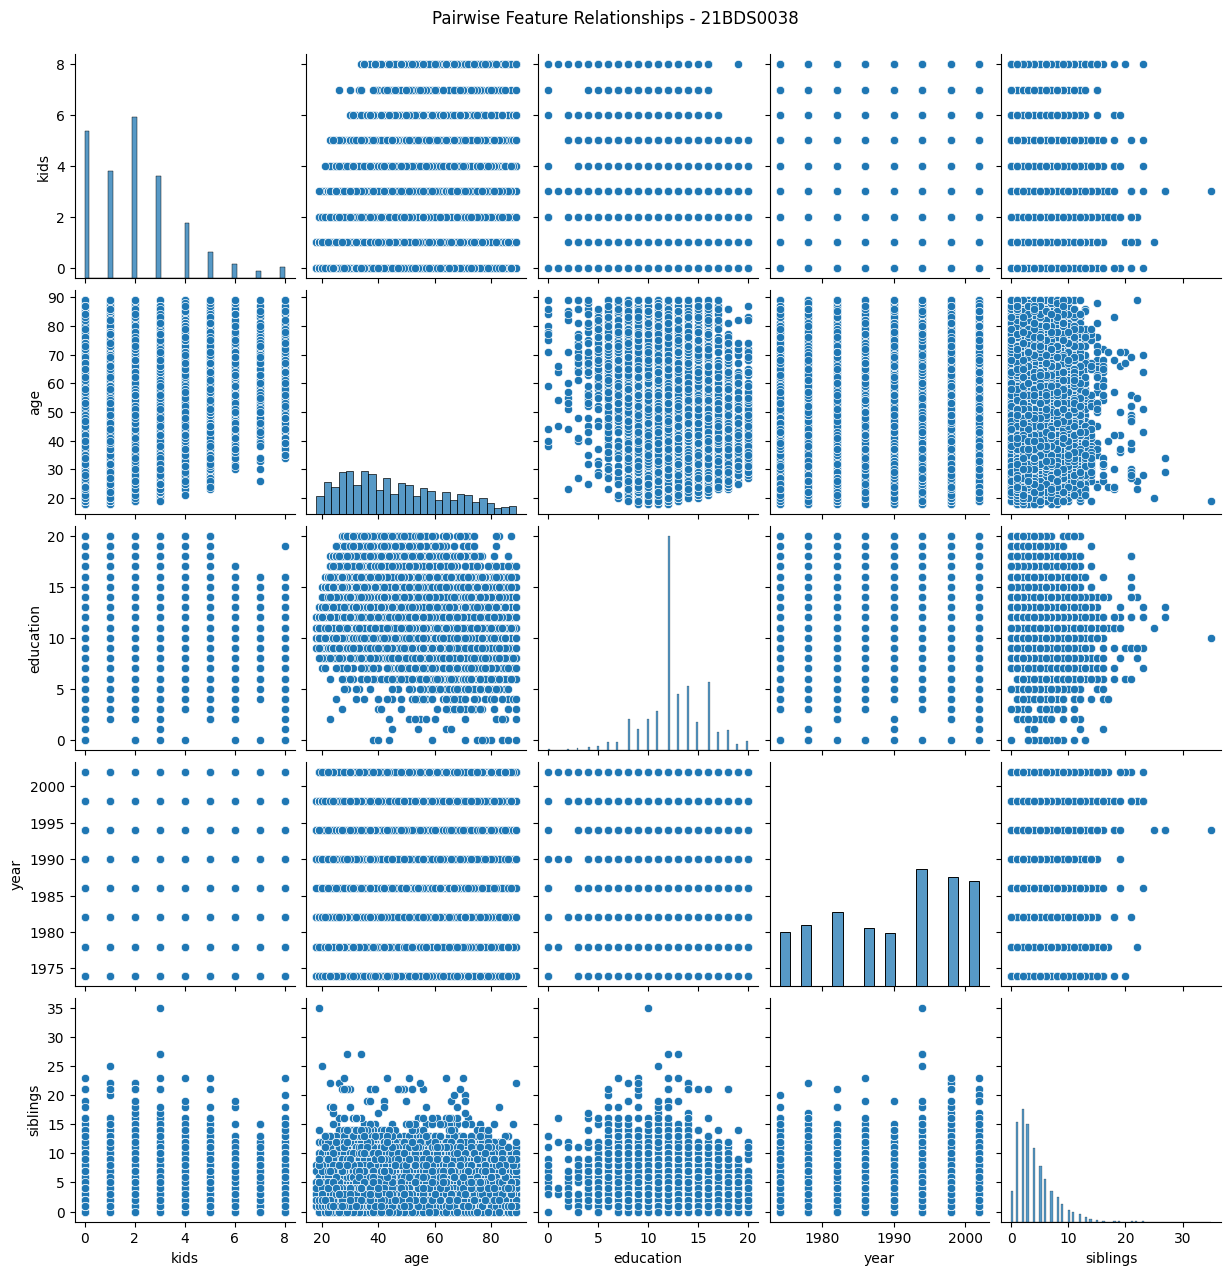

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1D - Age Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 2D - Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='ethnicity', y='education', data=df)
plt.title("Education by Ethnicity")
plt.show()

# 21BDS0038 - N-D: Pairplot of existing numeric and category-encoded features
import seaborn as sns
import matplotlib.pyplot as plt

# Define only columns that exist and are useful
pairplot_cols = ['kids', 'age', 'education', 'year', 'siblings']


# Plot
sns.pairplot(df[existing_cols])  # 21BDS0038
plt.suptitle("Pairwise Feature Relationships - 21BDS0038", y=1.02)
plt.show()



**Step 5: Dimensionality Reduction (PCA)**

Description: Apply Principal Component Analysis (PCA) to reduce dimensionality for visualization.

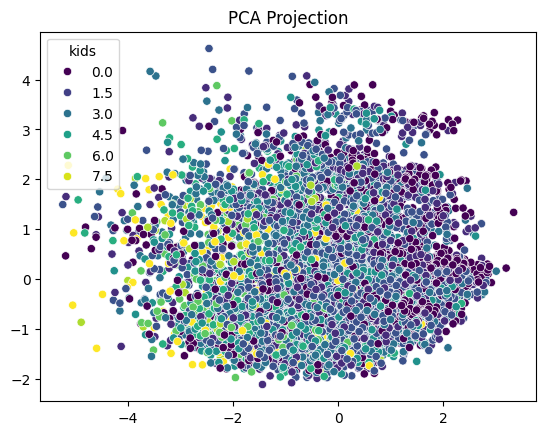

In [ ]:
# 21BDS0038
X_scaled = StandardScaler().fit_transform(df.drop(columns=['kids']))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['kids'], palette='viridis')
plt.title('PCA Projection')
plt.show()


**Step 6: Model Building – Classification**

Description: Build a classification model (Random Forest) to predict binned 'kids' values.

In [ ]:
# 21BDS0038
df['kids_cat'] = pd.cut(df['kids'], bins=[-1, 0, 1, 2, 100], labels=[0, 1, 2, 3])  # 21BDS0038

X = df.drop(columns=['kids', 'kids_cat'])
y = df['kids_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


**Step 7: Model Evaluation & Feature Importance**

Description: Evaluate model accuracy and visualize top features affecting predictions.

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       425
           1       0.21      0.13      0.16       309
           2       0.30      0.30      0.30       468
           3       0.48      0.58      0.52       622

    accuracy                           0.41      1824
   macro avg       0.37      0.37      0.37      1824
weighted avg       0.39      0.41      0.40      1824



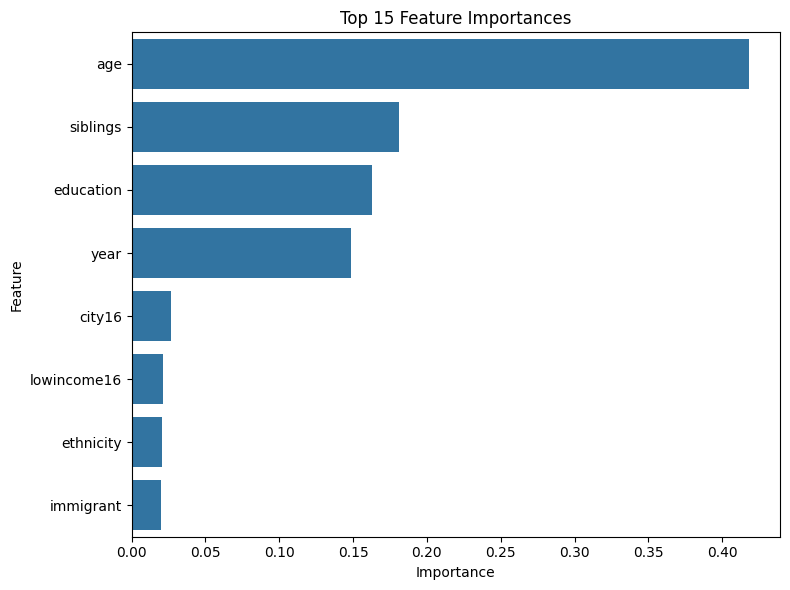

In [ ]:
# 21BDS0038
print("Classification Report:\n", classification_report(y_test, y_pred))  # 21BDS0038

imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=imp_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


**Step 8: Regression + Hyperparameter Tuning**

Description: Use Random Forest for regression and apply GridSearchCV for hyperparameter tuning.

In [ ]:
# Regression
y_reg = df['kids']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_r, y_train_r)
preds = reg_model.predict(X_test_r)

print(f"RMSE: {mean_squared_error(y_test_r, preds):.2f}")
print(f"R^2 Score: {r2_score(y_test_r, preds):.2f}")  # 21BDS0038

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Classification Report:\n", classification_report(y_test, grid_search.predict(X_test)))  # 21BDS0038


RMSE: 2.82
R^2 Score: 0.15
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.52       425
           1       0.22      0.04      0.06       309
           2       0.33      0.28      0.30       468
           3       0.47      0.77      0.58       622

    accuracy                           0.45      1824
   macro avg       0.40      0.39      0.37      1824
weighted avg       0.42      0.45      0.41      1824

